In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Train_Data.csv')
df.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [4]:
print(df['sex'].nunique(), df['smoker'].nunique(), df['region'].nunique())

2 2 4


<AxesSubplot:>

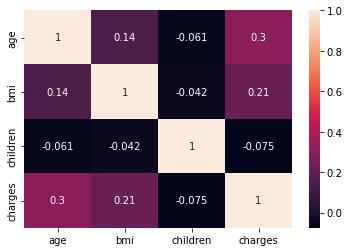

In [5]:
# Linear Correlation
cor = df.corr()
sns.heatmap(cor, annot=True)

In [6]:
# One-hot encoding for categorical features
df1 = pd.get_dummies(df)

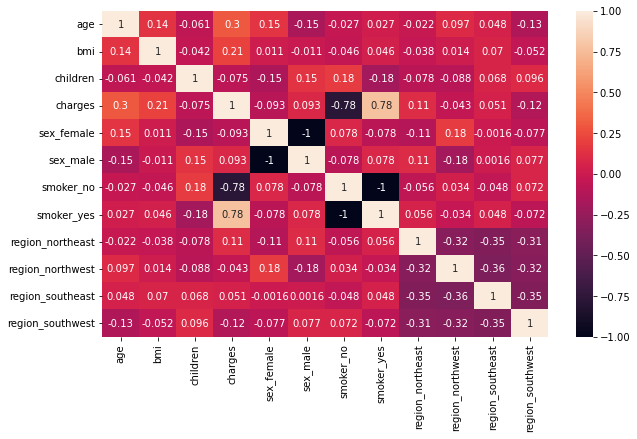

In [7]:
cor = df1.corr()
fig, ax = plt.subplots(figsize=(10,6))   
sns.heatmap(cor, annot=True)
plt.show()

In [8]:
X = df1.loc[:,['age','bmi','smoker_yes']]
y = df1.loc[:,'charges']

<AxesSubplot:xlabel='charges'>

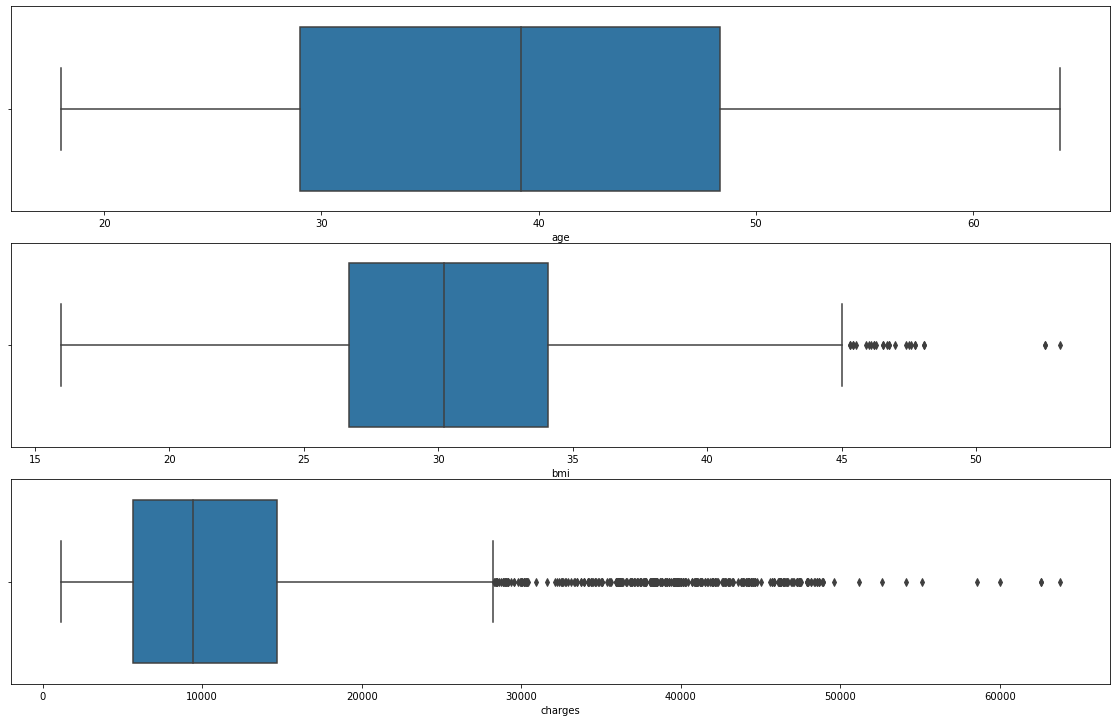

In [9]:
f, ax = plt.subplots(3, 1, figsize=(16,10))
f.tight_layout()
ax1,ax2,ax3 = ax.flatten()
sns.boxplot(x = X['age'], ax=ax1)
sns.boxplot(x = X['bmi'], ax=ax2)
sns.boxplot(x = y, ax=ax3)

In [10]:
df_50 = df1[df1['bmi']>50]
df_50

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
316,22.0,52.58,1,44501.3982,0,1,0,1,0,0,1,0
852,18.0,53.13,0,1163.4627,0,1,1,0,0,0,1,0
3469,22.0,52.58,1,44501.3982,0,1,0,1,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

x_train,x_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# linear Regression
from sklearn.linear_model import LinearRegression, Lasso, Ridge

#Linear regression
lin_reg = LinearRegression(normalize=False)
lin_reg.fit(x_train, y_train)
y_predict_lin_reg = lin_reg.predict(x_val)

#Lasso
lasso = Lasso(alpha=0.1, normalize=False)
lasso.fit(x_train, y_train)
y_predict_lasso = lasso.predict(x_val)

#Ridge
ridge = Ridge(alpha=0.1, normalize=False)
ridge.fit(x_train, y_train)
y_predict_ridge = ridge.predict(x_val)

print('Linear: ', mean_squared_error(y_val, y_predict_lin_reg, squared=False),'\n',
      'Lasso: ', mean_squared_error(y_val, y_predict_lasso, squared=False),'\n',
      'Ridge:', mean_squared_error(y_val, y_predict_ridge, squared=False))

C:\Users\Harsha\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
C:\Users\Harsha\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\linear_model\_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
C:\Users\Harsha\AppData\Local\Continuum\anaconda3\envs\tensorflow_env\lib\

Linear:  5907.753060847754 
 Lasso:  5907.76761371428 
 Ridge: 5907.868874753986


In [13]:
test = pd.read_csv('Test_Data.csv')
test.head()

,age,sex,bmi,smoker,region,children
0,40.000000,male,29.900000,no,southwest,2
1,47.000000,male,32.300000,no,southwest,1
2,54.000000,female,28.880000,no,northeast,2
3,37.000000,male,30.568094,no,northeast,3
4,59.130049,male,33.132854,yes,northeast,4


In [14]:
# One-hot encoding for categorical features
test = pd.get_dummies(test)
test

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,40.000000,29.900000,2,0,1,1,0,0,0,0,1
1,47.000000,32.300000,1,0,1,1,0,0,0,0,1
2,54.000000,28.880000,2,1,0,1,0,1,0,0,0
3,37.000000,30.568094,3,0,1,1,0,1,0,0,0
4,59.130049,33.132854,4,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
487,51.000000,27.740000,1,0,1,1,0,1,0,0,0
488,33.000000,42.400000,5,0,1,1,0,0,0,0,1
489,47.769999,29.064615,4,0,1,1,0,1,0,0,0
490,41.530738,24.260852,5,1,0,1,0,0,0,1,0


<AxesSubplot:xlabel='bmi'>

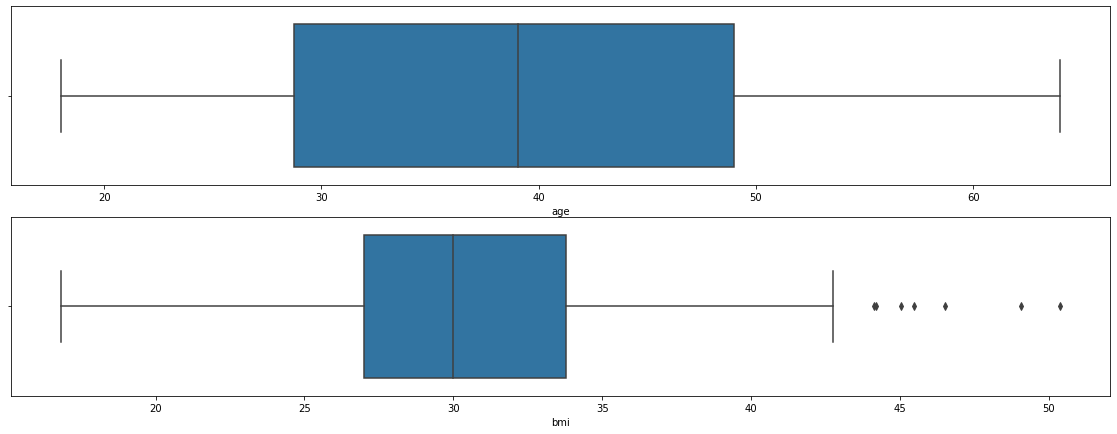

In [15]:
X_test = test.loc[:,['age','bmi','smoker_yes']]

f, ax = plt.subplots(2, 1, figsize=(16,6))
f.tight_layout()
ax1,ax2 = ax.flatten()
sns.boxplot(x = X_test['age'], ax=ax1)
sns.boxplot(x = X_test['bmi'], ax=ax2)